# Regression Project - Concrete

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

C:\Users\Alp\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Alp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\Alp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
df = pd.read_csv('Concrete_Data.csv')

In [3]:
df.head(3)

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27


In [4]:
df.shape

(1030, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
flyash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseaggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineaggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
csMPa,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


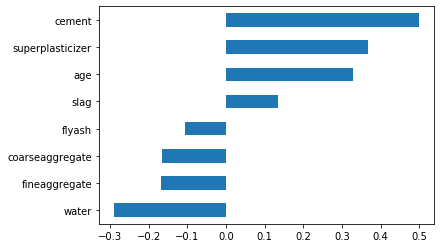

In [7]:
df.corr()['csMPa'].sort_values().head(11)[:-1].plot.barh();

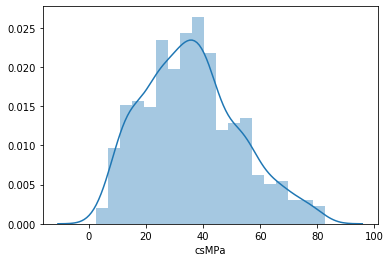

In [11]:
sns.distplot(df.csMPa);

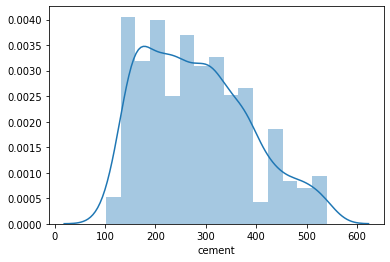

In [12]:
sns.distplot(df.cement);

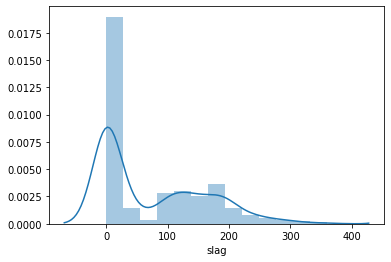

In [8]:
sns.distplot(df.slag);

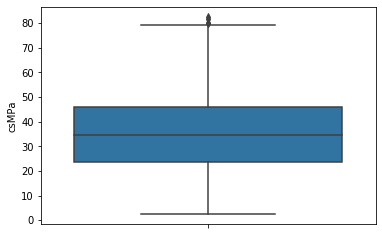

In [11]:
sns.boxplot(df.csMPa, orient = 'v')

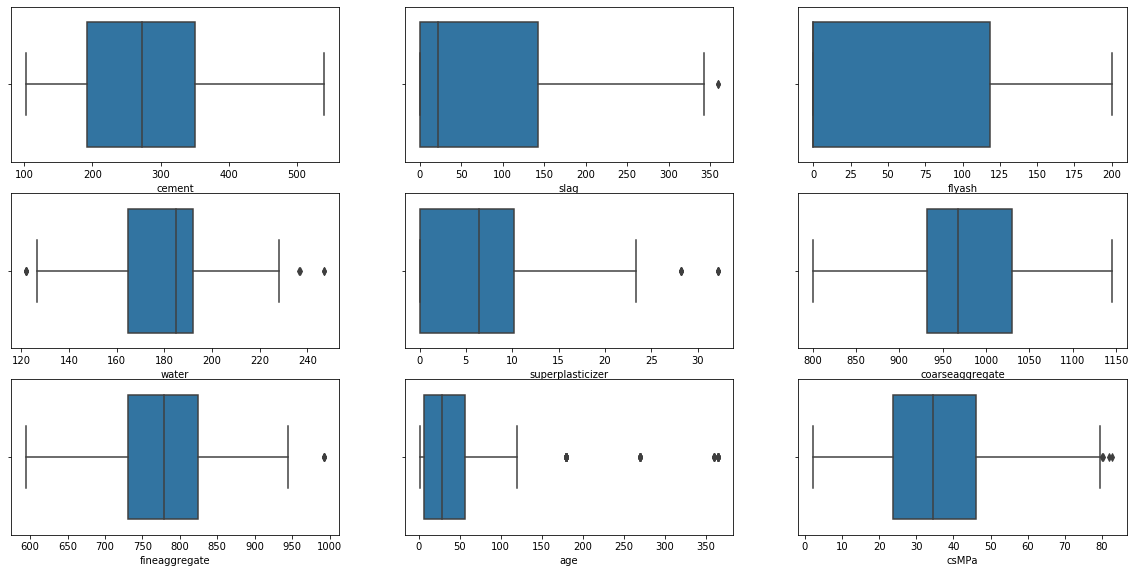

In [9]:
fig = plt.figure(figsize=(20,20))
for col in range(len(df.columns)) :
    fig.add_subplot(6,3,col+1)
    sns.boxplot(x=df.iloc[ : , col])
plt.show()

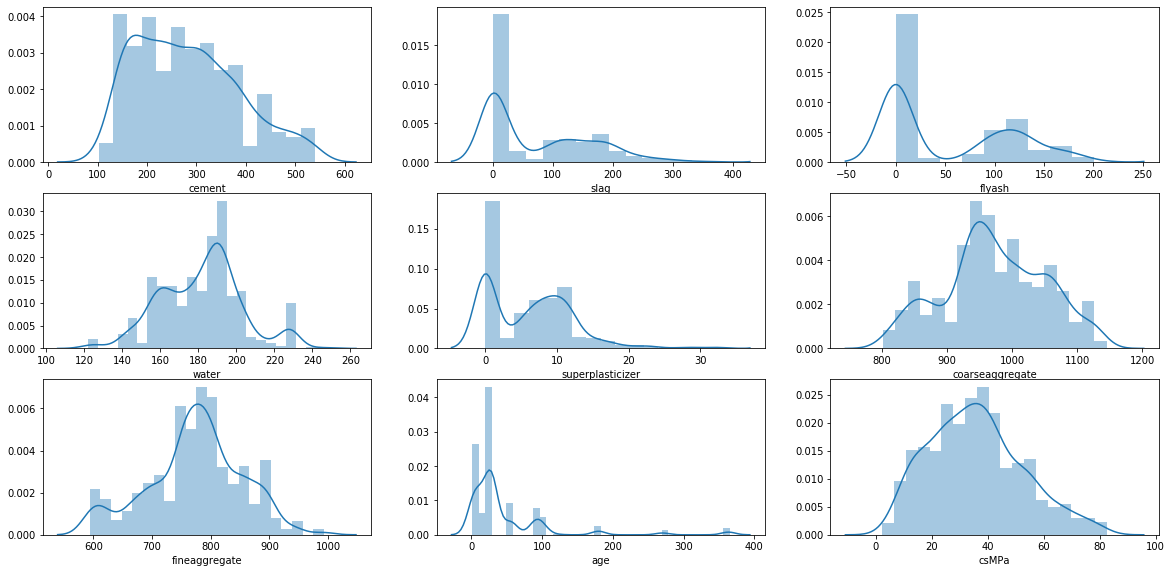

In [11]:
fig = plt.figure(figsize=(20,20))
for col in range(len(df.columns)) :
    fig.add_subplot(6,3,col+1)
    sns.distplot(df.iloc[ : , col])
plt.show()

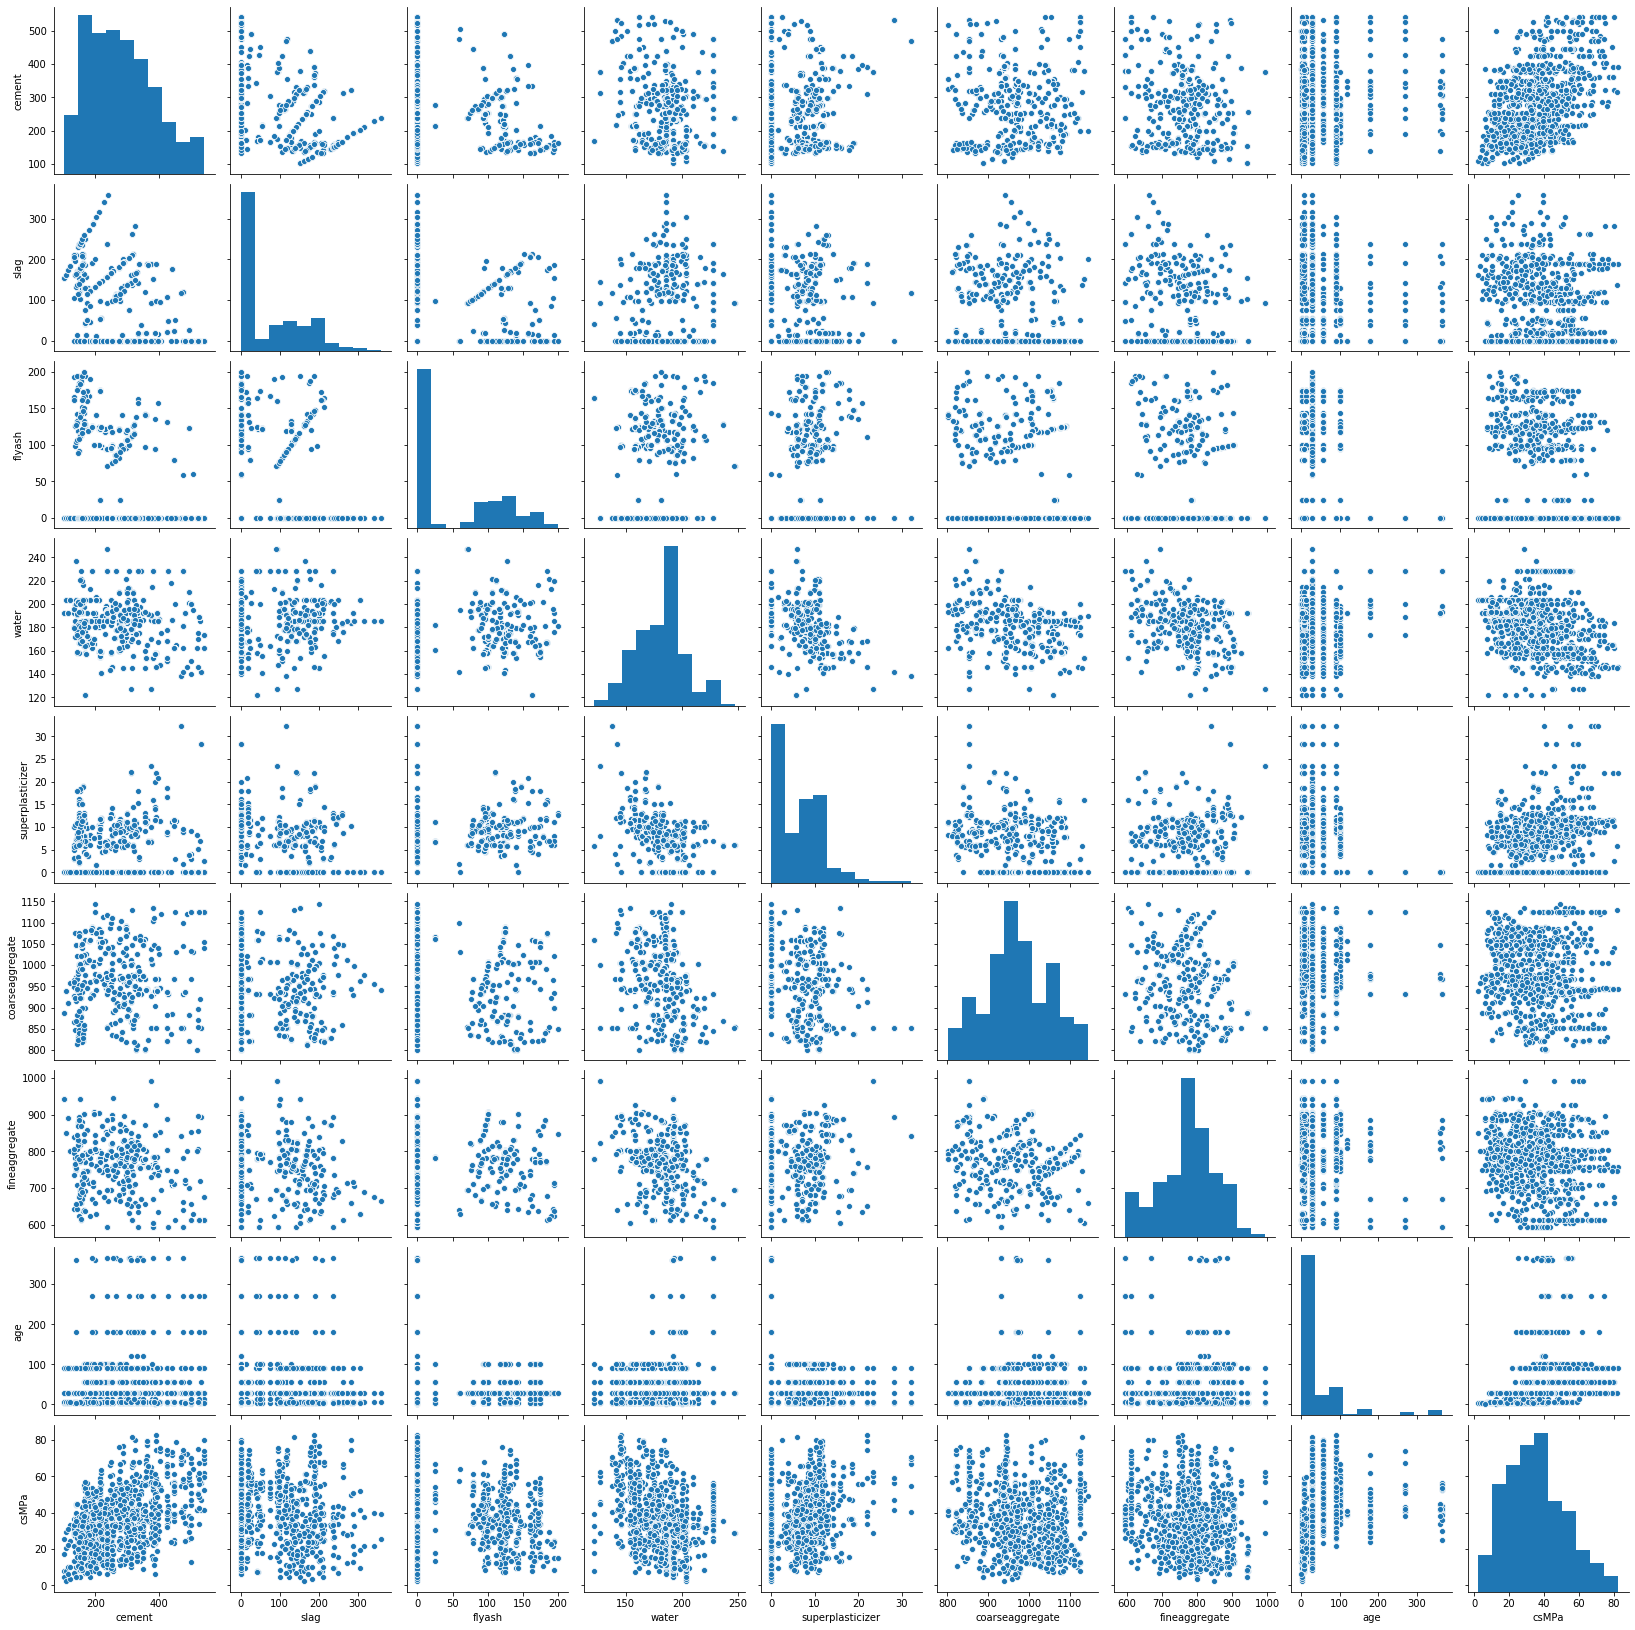

In [12]:
sns.pairplot(df);

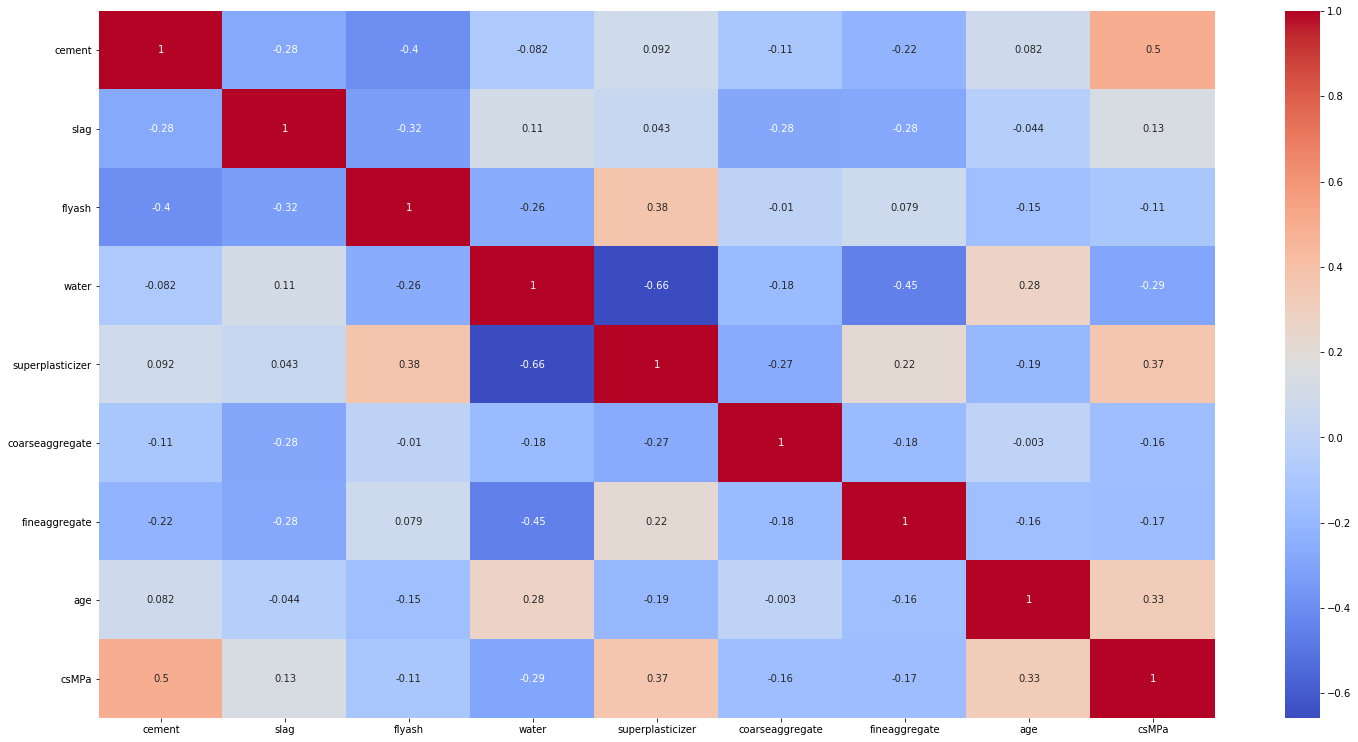

In [13]:
plt.figure(figsize=(25, 13))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm');

In [8]:
X = df.drop(['csMPa'], axis = 1)
y = df['csMPa']

In [9]:
X.shape

(1030, 8)

In [10]:
y.shape

(1030,)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

**1. Linear Regression**

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lm = LinearRegression()

In [22]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
y_pred = lm.predict(X_test)

In [24]:
eval_metrics(y_test, y_pred) 

r2_score: 0.6275531792314851 
 mae: 7.745559243921434 
 mse: 95.97094009110677 
 rmse: 9.796475901624358


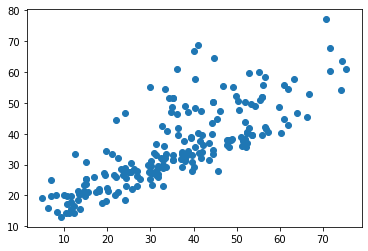

In [25]:
plt.scatter(y_test, y_pred);

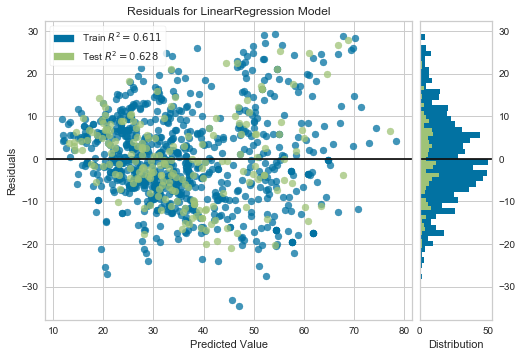

In [26]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(lm)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

In [27]:
my_dict = {'Actual': y_test, 'Pred': y_pred}

In [28]:
compare = pd.DataFrame(my_dict)
compare.sample(15)

,Actual,Pred
603,36.45,41.942250
760,29.98,27.963739
63,50.66,47.801538
106,55.90,52.041211
136,74.50,63.535133
755,71.62,67.863041
635,15.58,21.165376
1025,44.28,39.865613
60,54.38,48.993788
261,37.40,29.366198


**CrossValidation - CV**

In [29]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(estimator=lm, X=X_train, y=y_train, cv=5)
cv_scores.mean()

0.5946055391992531

In [30]:
accuraries = cross_val_score(estimator=lm, X=X_train, y=y_train, scoring = "neg_mean_absolute_error", cv=10)
-accuraries.mean()

8.449085191761577

**Ridge Regression**

In [32]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [33]:
ridge_model = Ridge(normalize = True)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

In [34]:
eval_metrics(y_test, y_pred)

r2_score: 0.4543314313295702 
 mae: 9.789608304785087 
 mse: 140.60618212665062 
 rmse: 11.857747767879474


In [35]:
ridge_model.alpha

1.0

In [36]:
alpha_space = np.linspace(0.1, 20, 100)

In [37]:
ridgecv = RidgeCV(alphas = alpha_space, normalize = True, cv = 5)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.1303030...
       15.17575758, 15.37676768, 15.57777778, 15.77878788, 15.97979798,
       16.18080808, 16.38181818, 16.58282828, 16.78383838, 16.98484848,
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
        cv=5, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [38]:
ridgecv.alpha_

0.1

In [39]:
ridge_model = Ridge(alpha = 0.1, normalize = True)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

In [40]:
eval_metrics(y_test, y_pred)

r2_score: 0.608947460896801 
 mae: 8.169587838624908 
 mse: 100.76520380898606 
 rmse: 10.038187277042905


In [45]:
ridge_model = Ridge(alpha = 0.01, normalize = True)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

In [46]:
eval_metrics(y_test, y_pred)

r2_score: 0.6267332865635076 
 mae: 7.797306725783632 
 mse: 96.18220748750244 
 rmse: 9.807252800224049


**Lasso Regression**

In [25]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [26]:
lasso_model = Lasso(normalize = True)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)

In [54]:
eval_metrics(y_test, y_pred)

r2_score: -0.00015448052100297538 
 mae: 13.052344236026016 
 mse: 257.71670042416815 
 rmse: 16.053557251405937


In [55]:
lassocv = LassoCV(alphas = alpha_space, normalize = True, cv = 5) 
lassocv.fit(X_train, y_train)

LassoCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.1303030...
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=True, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [56]:
lassocv.alpha_

0.1

In [57]:
lasso_model = Lasso(alpha = 0.1, normalize = True)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)

In [58]:
eval_metrics(y_test, y_pred)

r2_score: 0.4429558286421522 
 mae: 9.937719612147946 
 mse: 143.53741209865504 
 rmse: 11.980709999772762


In [59]:
lasso_model = Lasso(alpha = 0.01, normalize = True)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)

In [60]:
eval_metrics(y_test, y_pred)

r2_score: 0.6183269275527674 
 mae: 7.971717501231669 
 mse: 98.34833197029273 
 rmse: 9.91707275209236


In [61]:
lasso_model = Lasso(alpha = 0.0001, normalize = True)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)

In [62]:
eval_metrics(y_test, y_pred)

r2_score: 0.627561159308472 
 mae: 7.74753860480038 
 mse: 95.96888380965201 
 rmse: 9.796370951002826


Try without normalizing

In [63]:
lassocv = LassoCV(alphas = alpha_space, normalize = False, cv = 5) #lasso kendi CV fonksiyonu - alphas icindeki degerleri deneyecek 
lassocv.fit(X_train, y_train)

LassoCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.1303030...
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [64]:
lassocv.alpha_

7.336363636363636

In [65]:
lasso_model = Lasso(alpha = 7.33636, normalize = False)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)

In [66]:
eval_metrics(y_test, y_pred)

r2_score: 0.6228865647996998 
 mae: 7.788704791698947 
 mse: 97.17341880508006 
 rmse: 9.857657876244238


almost the same

In [67]:
feature_coef = pd.DataFrame({'features' : X.columns, 'coef' : lasso_model.coef_})

In [73]:
feature_coef

,features,coef
0,cement,0.110838
1,slag,0.097780
2,flyash,0.075116
3,water,-0.212017
4,superplasticizer,0.000000
5,coarseaggregate,0.000000
6,fineaggregate,0.009991
7,age,0.112533


In [74]:
feature_coef.shape

(8, 2)

superplasticizer ve coarseaggregate sifirlanmis

In [75]:
significant_features = feature_coef.loc[feature_coef.coef != 0, :]
len(significant_features)

6

In [76]:
significant_features.shape

(6, 2)

In [77]:
lasso_model = Lasso(alpha = 50, normalize = False)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.5722468279927062 
 mae: 8.485913243856118 
 mse: 110.22210891687989 
 rmse: 10.49867176917537


alpha'yi cok arttirdim (50'ye), feature sayisi 6'ya inmesine ragmen r2_score'da dusme fazla degil 

In [78]:
feature_coef = pd.DataFrame({'features' : X.columns, 'coef' : lasso_model.coef_})
significant_features = feature_coef.loc[feature_coef.coef != 0, :]
len(significant_features)

6

In [79]:
significant_features.sort_values(by='coef', ascending = False)

,features,coef
0,cement,0.097531
7,age,0.088362
1,slag,0.077022
2,flyash,0.050585
6,fineaggregate,0.001997
3,water,-0.129145


**Random Forest Regressor**

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
rf_reg = RandomForestRegressor()

In [28]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [29]:
y_pred = rf_reg.predict(X_test)

In [30]:
eval_metrics(y_test, y_pred)

r2_score: 0.8760814825958013 
 mae: 3.965567780859919 
 mse: 31.930938718815536 
 rmse: 5.6507467399287625


In [31]:
import pickle 
pickle.dump(rf_reg, open('rf_reg', 'wb'))

add some CV

In [86]:
cv_scores = cross_val_score(estimator = rf_reg, X = X_train, y = y_train, cv =3)
cv_scores.mean()

0.8995289849597103

**RF Feature Importance**

In [88]:
rf_reg.feature_importances_

array([0.3357392 , 0.07996596, 0.01729716, 0.12362899, 0.04759985,
       0.02981436, 0.03470658, 0.33124789])

In [89]:
importance = pd.DataFrame({'importance':rf_reg.feature_importances_},
                          index = X_train.columns)

In [90]:
importance.sort_values(by="importance", ascending = False).head(10)

,importance
cement,0.335739
age,0.331248
water,0.123629
slag,0.079966
superplasticizer,0.047600
fineaggregate,0.034707
coarseaggregate,0.029814
flyash,0.017297


In [91]:
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


**Feature Selection with RF**

In [ ]:
#feature selection olarak bu 4 parametre secildi - importance'a gore

In [92]:
new_list = ['cement', 'age', 'water', 'slag']  

In [94]:
X = df[new_list]
y = df['csMPa']
X = pd.get_dummies(X)

In [96]:
X.shape

(1030, 4)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [98]:
rf_reg = RandomForestRegressor()

In [99]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [100]:
y_pred = rf_reg.predict(X_test)

In [101]:
eval_metrics(y_test, y_pred)

r2_score: 0.8712903374599394 
 mae: 4.0740675572122065 
 mse: 33.16550611786815 
 rmse: 5.7589500881556654


apply CV:

In [102]:
accuraries = cross_val_score(estimator=rf_reg, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.8991617639757303

**RF Model Tuning**

In [104]:
rf_params = {"n_estimators":[50, 100, 300],
              "max_depth":[3,5,7],
              "max_features": [2,4,6,8],
              "min_samples_split": [2,4,6]}

In [105]:
rf_cv_model = GridSearchCV(rf_reg, rf_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   21.2s finished


In [106]:
rf_cv_model.best_params_

{'max_depth': 7,
 'max_features': 4,
 'min_samples_split': 2,
 'n_estimators': 300}

In [107]:
rf_tuned = RandomForestRegressor(max_depth = 7,
                                max_features = 4,
                                min_samples_split = 2,
                                 n_estimators = 300)
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features=4, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [108]:
y_pred = rf_tuned.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8484738420262244 
 mae: 4.864025177736017 
 mse: 39.044789801481706 
 rmse: 6.248583023492743


In [109]:
accuraries = cross_val_score(estimator=rf_tuned, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.8769940104940375

max depth kullanilmazsa

In [110]:
rf_tuned_2 = RandomForestRegressor(max_features = 4,
                                min_samples_split = 2,
                                 n_estimators = 300)
rf_tuned_2.fit(X_train, y_train)    # max feature???? cok degistirilmemeli

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=4, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [111]:
y_pred = rf_tuned_2.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8728869812843575 
 mae: 4.0361723049262865 
 mse: 32.7540878957878 
 rmse: 5.723118721098471


In [112]:
accuraries = cross_val_score(estimator=rf_tuned, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.8755856126498014

**XGBOOST Regressor**

In [113]:
X=df.drop(['csMPa'], axis=1)
y=df['csMPa']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [16]:
import xgboost

In [115]:
model_xg = xgboost.XGBRegressor()
model_xg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [116]:
y_pred = model_xg.predict(X_test)

In [117]:
eval_metrics(y_test, y_pred)

r2_score: 0.9300780437301508 
 mae: 2.841180106690786 
 mse: 18.41601985920957 
 rmse: 4.291389036105858


In [33]:
xgboost.__version__

'1.2.1'

**XGBoost - 4 parameters**

In [13]:
new_list = ['cement', 'age', 'water', 'slag']

In [14]:
X=df[new_list]
y=df['csMPa']
X=pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
xgboost_model = xgboost.XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [21]:
y_pred = model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.9234763522315677 
 mae: 2.918025233213184 
 mse: 19.71837590231892 
 rmse: 4.440537794267595


sadece 4 column kullanilinca infinitesimal bir dusme oldu

In [25]:
import pickle 
pickle.dump(xgboost_model, open('xgboost_model', 'wb'))

**GridSearch with XGBOOST**

In [123]:
xgb_params = {"n_estimators": [50, 100, 300],
             "subsample":[0.5,0.8,1],
             "max_depth":[3,5,7],
             "learning_rate":[0.1,0.01,0.3]}

In [124]:
from sklearn.model_selection import GridSearchCV
xgb_cv_model  = GridSearchCV(model,xgb_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 382 out of 405 | elapsed:   10.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:   10.8s finished


In [125]:
xgb_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.5}

In [126]:
xgb_tuned = xgboost.XGBRegressor(subsample = 0.5, 
                         learning_rate = 0.1, 
                         max_depth = 5, 
                         n_estimators = 300).fit(X_train, y_train)

In [127]:
y_pred = xgb_tuned.predict(X_test)
eval_metrics(y_test,y_pred)

r2_score: 0.9113986553680253 
 mae: 3.14929532912171 
 mse: 22.830519321177597 
 rmse: 4.778129270036297
